In [1]:
# cell added by Kannan for get the environment details and performance stats
from time import time, ctime
print('Current time:', ctime(time()))

!pip install ipython-autotime
%load_ext autotime

Current time: Fri May 29 00:10:12 2020


In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

time: 3.67 s


In [3]:
sns.set_style('whitegrid')

time: 1.99 ms


In [4]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


time: 76.3 ms


- convert prices to today's
- convert cabin to letter - one hot encode
- convert mle/female to 0/1
- Fare - bin to capture outliers
- drop: ticket, PassengerID
- age???? - bin, Nan could be a group
- embark - one hot encode


name notes:
- (maiden name)


y = Survived

In [5]:
# if the passanger didn't have a cabin put a Z in place
titanic_df['Cabin'].fillna('Z', inplace=True)

def assign_cabin(cabin):
    """
    Function to create cabin levels based on first ltter of cabin
    """
    return(cabin[0])

# create the cabin level column based on column
titanic_df['Cabin'] = titanic_df['Cabin'].apply(assign_cabin)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,S


time: 35.9 ms


In [6]:
# drop columns that are unique per passenger or family
titanic_df.drop(columns=['Ticket', 'PassengerId', 'Name'], inplace=True)

time: 4.72 ms


In [7]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Z,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,Z,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,Z,S


time: 28.7 ms


In [8]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


time: 64.1 ms


In [9]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

time: 13.2 ms


In [10]:
print(f"Median: {titanic_df['Age'].median()}")
print(f"Mode: {titanic_df['Age'].mode()}")

Median: 28.0
Mode: 0    24.0
dtype: float64
time: 11.1 ms


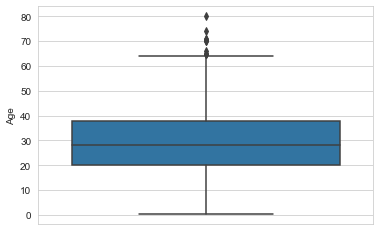

time: 305 ms


In [11]:
sns.boxplot(y=titanic_df['Age'])

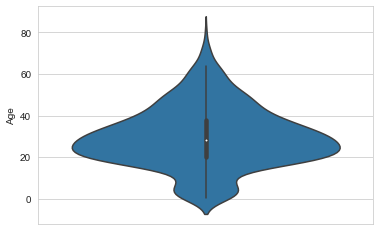

time: 243 ms


In [12]:
sns.violinplot(y=titanic_df['Age'])

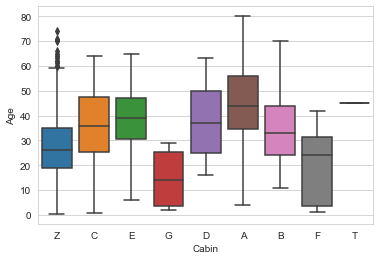

time: 548 ms


In [13]:
sns.boxplot(y=titanic_df['Age'], x=titanic_df['Cabin'])

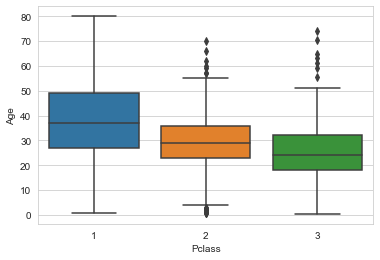

time: 323 ms


In [14]:
sns.boxplot(y=titanic_df['Age'], x=titanic_df['Pclass'])

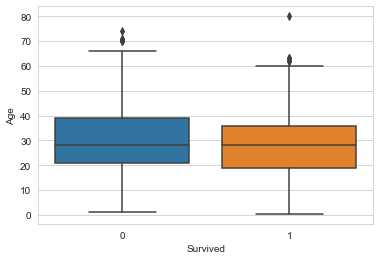

time: 276 ms


In [15]:
sns.boxplot(y=titanic_df['Age'], x=titanic_df['Survived'])

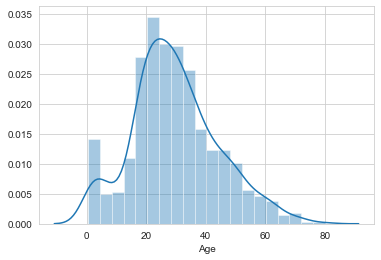

time: 513 ms


In [16]:
sns.distplot(titanic_df['Age'])

Titanic sink date:  April 12, 1912

Dataset age analysis
- Youngest passenger: 22 weeks
- Oldest 80 years
- Average: 30 years
- Median: 28 Years
- Modes 0, 24
- Lots of babies were on board - causes a strange dsitribution
- Lots of outliers on the upper end in the lower classes
- Only 80% of the dataset has an age listed


In [17]:
# this cell can be used to play with bin sizes
# 11 bins seemd to separate out everyone under 12
# this uses equal # of passengers in each bin
# this cell does not do anything to the dataset
# use the cell below fot he final age solution

titanic_ages = pd.read_csv('train.csv')

bins = 11
titanic_ages['AgeBin'] = pd.qcut(titanic_ages['Age'], q=bins)

for age_group in titanic_ages['AgeBin'].unique():
    print(age_group)

(21.0, 24.0]
(36.273, 42.0]
(24.0, 27.0]
(33.0, 36.273]
nan
(50.0, 80.0]
(0.419, 11.0]
(11.0, 18.0]
(18.0, 21.0]
(30.0, 33.0]
(27.0, 30.0]
(42.0, 50.0]
time: 33 ms


In [18]:
# Use this cell to choose your solution for Age  
# One of these options needs to applied

# ----- Drop Age Column -----
# titanic_df.drop(columns=['Age'], inplace=True)

# ----- Drop Empty Age Rows -----
# titanic_df.dropna(inplace=True)
#titanic_df = pd.get_dummies(titanic_df, columns=['AgeBin'])


# ----- Age bin solution -----
# create age bins (equal sized bins)
# nan will be an additional group
bins = 11
titanic_df['Age'] = pd.qcut(titanic_df['Age'], q=bins)
titanic_df = pd.get_dummies(titanic_df, columns=['Age'])

# If we won't be removing nones or binning we need to fill the empty values
# ----- Mean Age solution -----
# Give everyone without an age listed an average age
# titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


# ----- Arbitrary Age solution ----
# this could be used with bins and not alone
# this would create a bin on no age
# Give everyone without an age
# fill_age = 200
# titanic_df['Age'].fillna(fill_age, inplace=True)

time: 17.8 ms


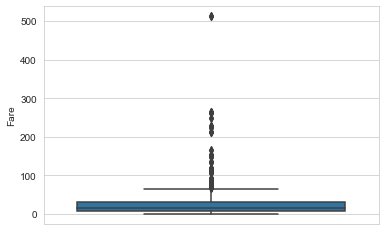

time: 208 ms


In [19]:
sns.boxplot(y=titanic_df['Fare'])

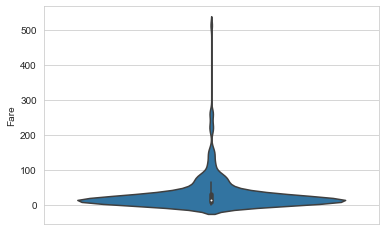

time: 193 ms


In [20]:
sns.violinplot(y=titanic_df['Fare'])

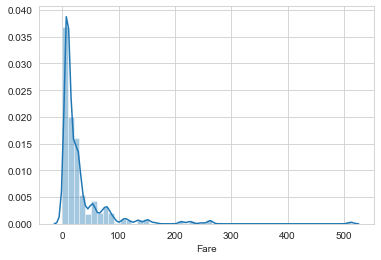

time: 649 ms


In [21]:
sns.distplot(titanic_df['Fare'])

In [22]:
# Use this cell to choose your solution for Fare

time: 980 µs


In [23]:
# encode the categorical values
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked', 'Cabin'])

time: 33.4 ms


In [24]:
# encode sex
encoder = LabelEncoder()
titanic_df['Sex'] = encoder.fit_transform(titanic_df['Sex'])

time: 5.01 ms


In [25]:
titanic_df.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,"Age_(0.419, 11.0]","Age_(11.0, 18.0]","Age_(18.0, 21.0]","Age_(21.0, 24.0]",...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208,0.076319,0.079686,0.072952,0.081930,...,0.722783,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,0.265657,0.270958,0.260203,0.274413,...,0.447876,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 216 ms


In [26]:
titanic_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,"Age_(0.419, 11.0]","Age_(11.0, 18.0]","Age_(18.0, 21.0]","Age_(21.0, 24.0]",...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z
0,0,3,1,1,0,7.2500,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,71.2833,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,0,0,7.9250,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,53.1000,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,3,1,0,0,8.0500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


time: 41.3 ms


In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Sex                 891 non-null    int32  
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Fare                891 non-null    float64
 6   Age_(0.419, 11.0]   891 non-null    uint8  
 7   Age_(11.0, 18.0]    891 non-null    uint8  
 8   Age_(18.0, 21.0]    891 non-null    uint8  
 9   Age_(21.0, 24.0]    891 non-null    uint8  
 10  Age_(24.0, 27.0]    891 non-null    uint8  
 11  Age_(27.0, 30.0]    891 non-null    uint8  
 12  Age_(30.0, 33.0]    891 non-null    uint8  
 13  Age_(33.0, 36.273]  891 non-null    uint8  
 14  Age_(36.273, 42.0]  891 non-null    uint8  
 15  Age_(42.0, 50.0]    891 non-null    uint8  
 16  Age_(50.

In [28]:
# Get the data ready for the model
y = titanic_df['Survived']
X = titanic_df.drop(columns=['Survived'])

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 29)
print(type(train_X))

<class 'pandas.core.frame.DataFrame'>
time: 13.3 ms


In [29]:
print('--- Training Data ---')
print(f'X shape: {train_X.shape}')
print(f'y shape: {train_y.shape}')
print('--- Testing Data ---')
print(f'X shape: {test_X.shape}')
print(f'y shape: {test_y.shape}')

--- Training Data ---
X shape: (668, 28)
y shape: (668,)
--- Testing Data ---
X shape: (223, 28)
y shape: (223,)
time: 3 ms


In [30]:
clf = LogisticRegression(random_state=29, max_iter=500)
# clf.fit(train_X, train_y)
# clf.score(train_X, train_y)
cross_val_score(clf, train_X, train_y, cv=5).mean()

0.8069913589945011

time: 794 ms


In [31]:
clf_cv = LogisticRegressionCV(cv=5, random_state=29, max_iter=500)
# clf_cv.fit(train_X, train_y)
# clf_cv.score(train_X, train_y)
cross_val_score(clf_cv, train_X, train_y, cv=5).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.8099876557064303

time: 11.6 s


In [32]:
clf_sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, random_state=29))
# clf_sgd.fit(train_X, train_y)
# clf_sgd.score(train_X, train_y)
cross_val_score(clf_sgd, train_X, train_y, cv=5).mean()

0.7232072719111211

time: 93.8 ms


In [33]:
#depths = [20, 21, 22, 23, 24, 25]
#depths = [2, 5, 10, 50, 100, 200, 500]
# depths = [5, 10, 15, 20, 25, 30]
depths = [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for depth in depths:
    clf_rf = RandomForestClassifier(max_depth=depth, random_state=29)
    #clf_rf.fit(train_X, train_y)
    print(f'depth {depth}: {cross_val_score(clf_rf, train_X, train_y, cv=5).mean()}')

depth 2: 0.7604421501514982
depth 5: 0.8099315452811131
depth 6: 0.8099315452811131
depth 7: 0.8173942318482773
depth 8: 0.8218718437885759
depth 9: 0.8204017506452699
depth 10: 0.8188979912467736
depth 11: 0.823375603187072
depth 12: 0.8248793625855683
depth 13: 0.8263718998990012
depth 14: 0.8203905285602063
depth 15: 0.8144091572214117
time: 20.7 s


In [34]:
clf_rf = RandomForestClassifier(max_depth=13, random_state=29)
# clf_rf.fit(train_X, train_y)
# clf_rf.score(train_X, train_y)
cross_val_score(clf_rf, train_X, train_y, cv=5).mean()

0.8263718998990012

time: 1.59 s


In [35]:
clf_lsvc = make_pipeline(StandardScaler(), LinearSVC(random_state=29, tol=1e-5, max_iter=10000))
# clf_lsvc.fit(train_X, train_y)
# clf_lsvc.score(train_X, train_y)
cross_val_score(clf_lsvc, train_X, train_y, cv=5).mean()

0.8069913589945011

time: 2.39 s


In [36]:
clf_nlsvc = make_pipeline(StandardScaler(), NuSVC(random_state=29))
# clf_nlsvc.fit(train_X, train_y)
# clf_nlsvc.score(train_X, train_y)
cross_val_score(clf_nlsvc, train_X, train_y, cv=5).mean()

0.8038716193468746

time: 177 ms


In [37]:
clf_svc = make_pipeline(StandardScaler(), SVC(random_state=29, gamma='auto'))
# clf_svc.fit(train_X, train_y)
# clf_svc.score(train_X, train_y)
cross_val_score(clf_svc, train_X, train_y, cv=5).mean()

0.8008753226349457

time: 166 ms


In [39]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(2, 29, 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


clf_rf_blank = RandomForestClassifier()
clf_rf_grid = GridSearchCV(clf_rf_blank, parameters)

time: 6.02 ms


In [40]:
# time consuimng part
clf_rf_grid.fit(train_X, train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True, False],
              

time: 8h 26min 41s


In [41]:
clf_rf_grid.score(train_X, train_y)

0.9281437125748503

time: 254 ms


In [42]:
clf_rf_grid

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True, False],
              

time: 7.94 ms


In [43]:
clf_rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

time: 1.9 ms


In [44]:
clf_rf_grid

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True, False],
              

time: 4.98 ms


In [45]:
params = {'bootstrap': False,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

clf_rfp = RandomForestClassifier(**params)
# clf_rfp.fit(train_X, train_y)
# clf_rfp.score(train_X, train_y)
cross_val_score(clf_rfp, train_X, train_y, cv=5).mean()

0.8263718998990013

time: 5.08 s


In [46]:
params = {'bootstrap': False,
 'max_depth': 13,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

clf_rfp = RandomForestClassifier(**params)
clf_rfp.fit(train_X, train_y)
# clf_rfp.score(train_X, train_y)
#cross_val_score(clf_rfp, train_X, train_y, cv=5).mean()

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

time: 1.03 s


In [47]:
pickle.dump(clf_rfp, open("clf_rfp.model", "wb"))

time: 494 ms


In [48]:
model = pickle.load(open("clf_rfp.model", "rb"))
model.score(train_X, train_y)

0.9086826347305389

time: 185 ms


In [49]:
pickle.dump(clf_rf_grid, open("clf_rfp.model", "wb"))

time: 49.5 ms


In [50]:
model = pickle.load(open("clf_rfp.model", "rb"))
model.score(test_X, test_y)

0.8340807174887892

time: 77 ms
